# Cat Dog Image Classification

Image Classification is the task of assigning an input image, one label from a fixed set of categories.

This project uses Tensorflow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time.

Convolutional neural networks or CNN’s are a class of deep learning neural networks. A convolution is a mathematical operation applied on a matrix. This matrix is usually the image represented in the form of pixels/numbers. The convolution operation extracts the features from the image. CNNs consist of convolutional layers, Relu layers, Pooling layers, and Fully connected dense layers.

https://towardsdatascience.com/easy-image-classification-with-tensorflow-2-0-f734fee52d13
https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay?usp=sharing

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

#import PIL
import pathlib

In [3]:
# Constants
IMG_HEIGHT = 160
IMG_WIDTH = 160
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
batch_size = 128
epochs = 15


In [19]:
def get_files_using_url():
    # This is not working. Getting 403 code. Try wget instead.
    URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
    path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)
    
def get_files_from_fcc():
    !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
    !unzip cats_and_dogs.zip
    
def get_files_from_google():
    import os
    import zipfile
    !wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
        -O /tmp/cats_and_dogs_filtered.zip
    local_zip = '/tmp/cats_and_dogs_filtered.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/tmp')
    zip_ref.close()
    return

#get_files_using_url()

In [9]:
# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats"
cwd = os.getcwd()
train_dir = os.path.join(cwd, 'cats_and_dogs/train')
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])

validation_dir = os.path.join(cwd, 'cats_and_dogs/validation')
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])

test_dir = os.path.join(cwd, 'cats_and_dogs/test')
total_test = len(os.listdir(test_dir))

print(f"Total number of Training Images {total_train}")
print(f"Total number of Validation Images {total_val}")
print(f"Total number of Test Images {total_test}")

Total number of Training Images 2001
Total number of Validation Images 1001
Total number of Test Images 51


In [10]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.204.jpg', 'cat.219.jpg', 'cat.658.jpg', 'cat.570.jpg', 'cat.469.jpg', 'cat.693.jpg', 'cat.99.jpg', 'cat.200.jpg', 'cat.691.jpg', 'cat.74.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [22]:
# Now let's take a look at a few pictures to get a better sense of what the cat and dog 
# datasets look like.

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


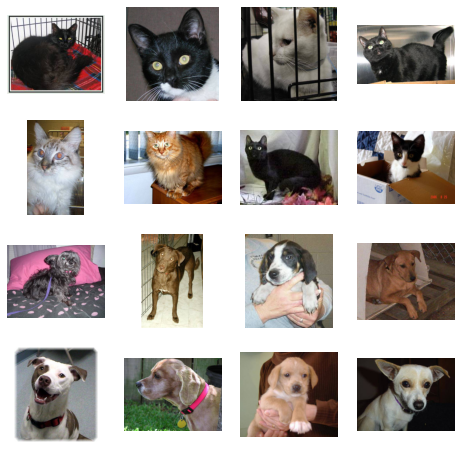

In [23]:

# You can rerun the cell to see a fresh batch each time

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Convnet from Scratch to Get to 72% Accuracy

The images that will go into our convnet are 150x150 color images.



## Create a Model

In our model, we will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.

**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples (1,000), using just three convolutional modules keeps the model small, which lowers the risk of overfitting 


We then compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

### The Sequential model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [24]:
""" Create models. Will be used to try out models with different parameters to see which ones work best """
def create_model():

    # reset the model.
    model = None

    # Define Sequential model
    model = tf.keras.Sequential()

    #----------------------Core Layer--------------------
    # Add Input layer - Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
    # the three color channels: R, G, and B
    model.add(tf.keras.layers.Input(shape=(150,150,3)))

    #----------------------Conv and Pooling Layers---------------------
    # convolution layer - extracts 16 filters that are 3x3 Convolution
    model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))

    # max-pooling layer with a 2x2 window
    model.add(tf.keras.layers.MaxPooling2D(2))

    # Second convolution extracts 32 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2))

    # Third convolution extracts 64 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2))

    #----------------------Reshaping Layers----------------------
    # Flatten feature map to a 1-dim tensor so we can add fully connected layers
    model.add(tf.keras.layers.Flatten())

    # Create a fully connected layer with ReLU activation and 512 hidden units
    model.add(tf.keras.layers.Dense(512, activation='relu'))

    # Create output layer (Prediction Layer) with a single node and sigmoid activation
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model


The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

## Set up Image Generators

Create image generators for each of the three image data sets (train, validation, test) using `ImageDataGenerator` to read / decode the images and convert them into floating point tensors. Use the `rescale` argument  to rescale the tensors from values between 0 and 255 to values between 0 and 1.


### Keras models accept three types of inputs:

1. NumPy arrays, just like Scikit-Learn and many other Python-based libraries. This is a good option if your data fits in memory.  
  
1. TensorFlow Dataset objects. This is a high-performance option that is more suitable for datasets that do not fit in memory and that are streamed from disk or from a distributed filesystem. **We use this for our Project**
  
1. Python generators that yield batches of data (such as custom subclasses of the keras.utils.Sequence class).

## Training Image

For API reference -  https://keras.io/api/preprocessing/image/#flowfromdirectory-method

In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
# A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of 
# images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

for x, y in train_data_gen:
    print(x.shape, x.dtype, x.ndim, x.size)
    print(y.shape, y.dtype, y.ndim, y.size)
    print(x[1,2,3])
    break

(128, 160, 160, 3) float32 4 9830400
(128,) float32 1 128
[0.07058824 0.07450981 0.08235294]


## Validation Image

For API reference -  https://keras.io/api/preprocessing/image/#flowfromdirectory-method

In [15]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
test_dir_top = os.path.join(cwd, 'cats_and_dogs')
! ls $test_dir_top

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory = test_dir_top,
    classes = ['test'],   # Will look for a "test" sub-directory only.
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    shuffle=False,
    class_mode=None)

test  train  validation
Found 50 images belonging to 1 classes.


## Plotting Functions
Create some utility functions that will help us visualize the data.

In [35]:
def plot_history(history):

    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')

    plt.figure()


    # Plot training and validation loss per epoch
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and validation loss')
    


In [30]:

def plot_images(images_arr, probabilities = False, ncols = 4):
    fig = plt.gcf()
    nrows = (len(images_arr) // ncols + 1)
    fig.set_size_inches(ncols * 3, nrows * 3)
    if probabilities is False:
      for ii, img in enumerate(images_arr):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, ii + 1)    
        sp.axis('Off') # Don't show axes (or gridlines)
        plt.imshow(img)

    else:
      ii = 1
      for img, probability in zip( images_arr, probabilities):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, ii + 1)    
        sp.axis('Off') # Don't show axes (or gridlines)
        plt.imshow(img)
        if probability > 0.5:
          sp.set_title("%.2f" % (probability*100) + "% dog")
        else:
          sp.set_title("%.2f" % ((1-probability)*100) + "% cat")        
        ii += 1
        
    plt.show()



# First attempt - Model trained with just the available data

Lets first create a model and train it with the training data that we already have(2k). We will then validate the model with the validaiton data that we have (1k) and see how our trained model performs against it. Finally we will use the test data to make actual predictions.

We will see later that we can improve the model by training it with additional data that we can genereate from exisitng data.

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 validation images. (This may take a few minutes to run.)

In [16]:
#Train the model for a fixed number of epochs (iterations on a dataset).

history = None
epochs=10

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 40s 2s/step - loss: 1.6459 - acc: 0.5155 - val_loss: 0.6737 - val_acc: 0.5130
Epoch 2/10
16/16 [==============================] - 41s 3s/step - loss: 0.6597 - acc: 0.6090 - val_loss: 0.6326 - val_acc: 0.6810
Epoch 3/10
16/16 [==============================] - 41s 3s/step - loss: 0.6688 - acc: 0.6325 - val_loss: 0.6289 - val_acc: 0.6840
Epoch 4/10
16/16 [==============================] - 40s 2s/step - loss: 0.6352 - acc: 0.6440 - val_loss: 0.6573 - val_acc: 0.5980
Epoch 5/10
16/16 [==============================] - 37s 2s/step - loss: 0.6176 - acc: 0.6535 - val_loss: 0.6104 - val_acc: 0.6990
Epoch 6/10
16/16 [==============================] - 37s 2s/step - loss: 0.6359 - acc: 0.6920 - val_loss: 0.5815 - val_acc: 0.7090
Epoch 7/10
16/16 [==============================] - 42s 3s/step - loss: 0.5699 - acc: 0.7360 - val_loss: 0.6383 - val_acc: 0.6290
Epoch 8/10
16/16 [==============================] - 38s 2s/step - loss: 0.5531 - acc: 0.72

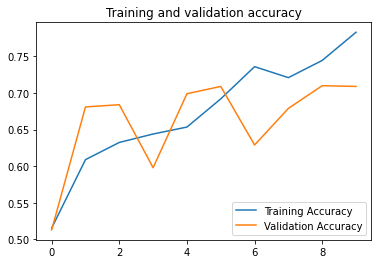

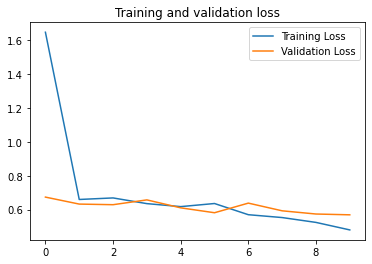

In [23]:
plot_history(history)

From the graph, we can see a couple of things
1. Our traing accuracy keep improving but around 4 epochs, the validation accurancy begins to suffer. ***This indicates that the model is being overfitted.***
1. Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions.
1. Let try to run this again with less epochs

## Predict using the trained model

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In [25]:
probabilities = model.predict(test_data_gen)
prediction = model.predict_classes(test_data_gen)


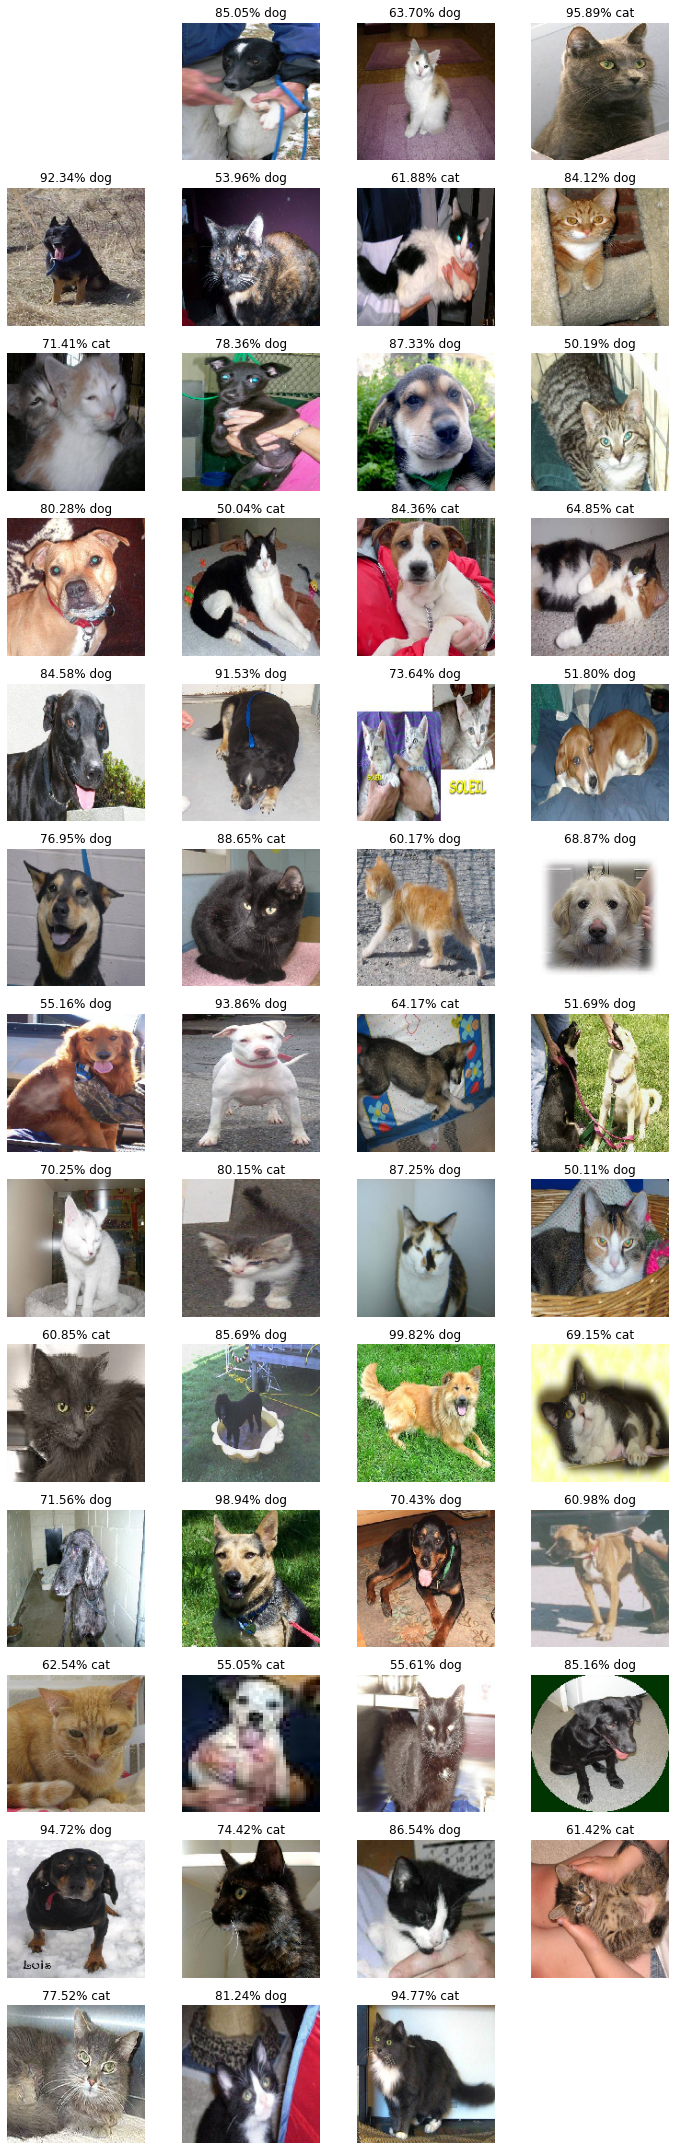

In [33]:
plot_images([test_data_gen[i][0] for i in range(50)],probabilities=probabilities,)

Epoch 1/10
16/16 [==============================] - 41s 3s/step - loss: 85.9555 - acc: 0.4855 - val_loss: 0.6930 - val_acc: 0.4970
Epoch 2/10
16/16 [==============================] - 41s 3s/step - loss: 0.6917 - acc: 0.5295 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/10
16/16 [==============================] - 42s 3s/step - loss: 0.6890 - acc: 0.5285 - val_loss: 0.6880 - val_acc: 0.5470
Epoch 4/10
16/16 [==============================] - 39s 2s/step - loss: 0.6895 - acc: 0.5265 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 5/10
16/16 [==============================] - 42s 3s/step - loss: 0.7008 - acc: 0.5130 - val_loss: 0.7861 - val_acc: 0.4890
Epoch 6/10
16/16 [==============================] - 41s 3s/step - loss: 0.9736 - acc: 0.4885 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/10
16/16 [==============================] - 42s 3s/step - loss: 0.6936 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/10
16/16 [==============================] - 42s 3s/step - loss: 0.6937 - acc: 0.4

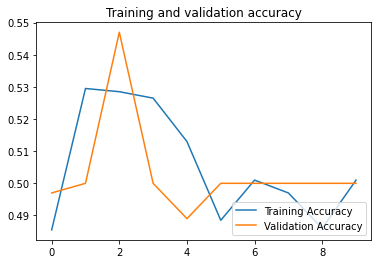

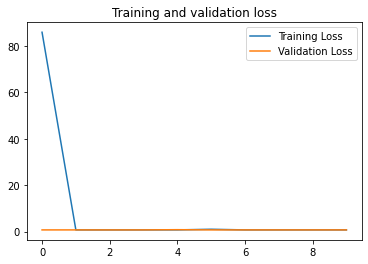

In [42]:
model = create_model()

# lets try with learning rate of .01 for faster convergence.
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['acc'])


history = None
epochs=10

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=epochs
)

plot_history(history)

## Results So Far

We see that our accuracy has suffered (from 87 to 54) when we increased the learning rate from .001 to .01. So we should go back to old learning rate and play with other parameters.

However we can also look at increasing the training data so that our model has more data to lear from. Lets try that instead.

## Create more training data

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Recreate the `train_image_generator` using `ImageDataGenerator`. Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [36]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    #Randomly flip inputs horizontally
    zoom_range=.25,          #Range for random zoom
    channel_shift_range=.4,  #Range for random channel shifts
    height_shift_range=2,
    width_shift_range=1,
    featurewise_center=True,
    
)


Let's create `train_data_gen` again but with the new `train_image_generator`.

In [39]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')




Found 2000 images belonging to 2 classes.


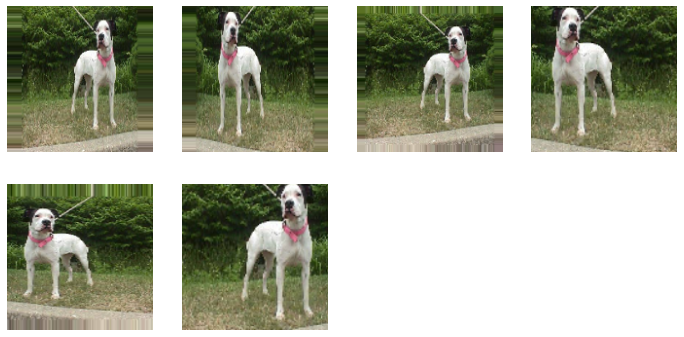

In [45]:
# A single image is plotted five different times using different variations. Every time the image is retrived, 
# it is modified in a different way each time. This way, our model sees different images in every epoch.
augmented_images = [train_data_gen[0][0][0] for i in range(6)]
plot_images(augmented_images)


## Try again with more training data



Epoch 1/10
16/16 [==============================] - 43s 3s/step - loss: 1.1706 - acc: 0.5250 - val_loss: 0.6704 - val_acc: 0.6060
Epoch 2/10
16/16 [==============================] - 40s 2s/step - loss: 0.6737 - acc: 0.5850 - val_loss: 0.6630 - val_acc: 0.5650
Epoch 3/10
16/16 [==============================] - 39s 2s/step - loss: 0.6915 - acc: 0.5920 - val_loss: 0.6428 - val_acc: 0.6290
Epoch 4/10
16/16 [==============================] - 41s 3s/step - loss: 0.6666 - acc: 0.6095 - val_loss: 0.6415 - val_acc: 0.6010
Epoch 5/10
16/16 [==============================] - 52s 3s/step - loss: 0.6547 - acc: 0.6285 - val_loss: 0.6251 - val_acc: 0.6800
Epoch 6/10
16/16 [==============================] - 45s 3s/step - loss: 0.6459 - acc: 0.6400 - val_loss: 0.6374 - val_acc: 0.5860
Epoch 7/10
16/16 [==============================] - 45s 3s/step - loss: 0.6145 - acc: 0.6655 - val_loss: 0.5864 - val_acc: 0.6660
Epoch 8/10
16/16 [==============================] - 40s 3s/step - loss: 0.6296 - acc: 0.67

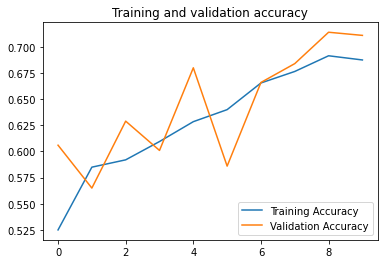

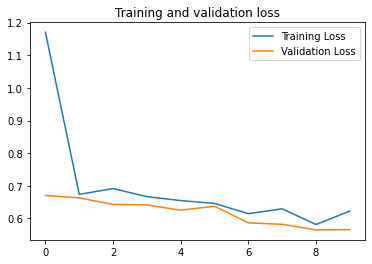

In [47]:

history = None
epochs=10

model = create_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

#  Each time you call .fit, keras will continue training on the model. .fit does not reset model weights.

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=epochs
)

plot_history(history)

Epoch 1/10
16/16 [==============================] - 40s 3s/step - loss: 0.5215 - acc: 0.7510 - val_loss: 0.5149 - val_acc: 0.7400
Epoch 2/10
16/16 [==============================] - 39s 2s/step - loss: 0.5500 - acc: 0.7280 - val_loss: 0.5505 - val_acc: 0.7140
Epoch 3/10
16/16 [==============================] - 40s 2s/step - loss: 0.5206 - acc: 0.7345 - val_loss: 0.6602 - val_acc: 0.6580
Epoch 4/10
16/16 [==============================] - 39s 2s/step - loss: 0.5190 - acc: 0.7390 - val_loss: 0.5186 - val_acc: 0.7460
Epoch 5/10
16/16 [==============================] - 40s 2s/step - loss: 0.5088 - acc: 0.7495 - val_loss: 0.5139 - val_acc: 0.7500
Epoch 6/10
16/16 [==============================] - 41s 3s/step - loss: 0.5095 - acc: 0.7665 - val_loss: 0.5169 - val_acc: 0.7340
Epoch 7/10
16/16 [==============================] - 40s 2s/step - loss: 0.4574 - acc: 0.7820 - val_loss: 1.3529 - val_acc: 0.5500
Epoch 8/10
16/16 [==============================] - 40s 2s/step - loss: 0.5123 - acc: 0.76

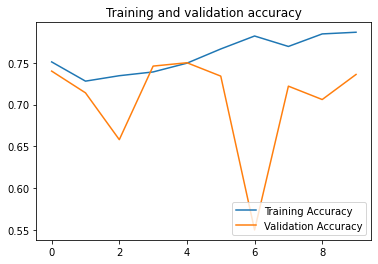

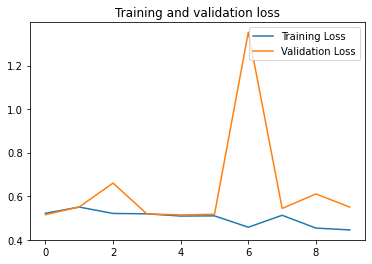

In [49]:
# Lets train some more. See if values improve

#  Each time you call .fit, keras will continue training on the model. .fit does not reset model weights.

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=10
)

plot_history(history)

Epoch 1/20
16/16 [==============================] - 40s 2s/step - loss: 0.4301 - acc: 0.8070 - val_loss: 0.4922 - val_acc: 0.7650
Epoch 2/20
16/16 [==============================] - 39s 2s/step - loss: 0.4363 - acc: 0.7935 - val_loss: 0.5333 - val_acc: 0.7490
Epoch 3/20
16/16 [==============================] - 40s 2s/step - loss: 0.4079 - acc: 0.8070 - val_loss: 0.4960 - val_acc: 0.7710
Epoch 4/20
16/16 [==============================] - 40s 3s/step - loss: 0.4032 - acc: 0.8165 - val_loss: 0.4858 - val_acc: 0.7740
Epoch 5/20
16/16 [==============================] - 40s 2s/step - loss: 0.4225 - acc: 0.8020 - val_loss: 0.4859 - val_acc: 0.7720
Epoch 6/20
16/16 [==============================] - 40s 2s/step - loss: 0.4015 - acc: 0.8170 - val_loss: 0.5702 - val_acc: 0.7440
Epoch 7/20
16/16 [==============================] - 40s 2s/step - loss: 0.3935 - acc: 0.8100 - val_loss: 0.5188 - val_acc: 0.7580
Epoch 8/20
16/16 [==============================] - 39s 2s/step - loss: 0.3753 - acc: 0.82

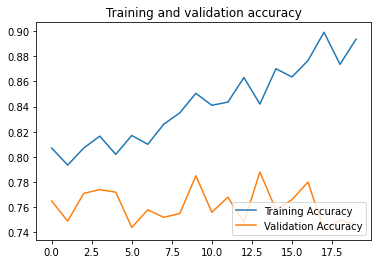

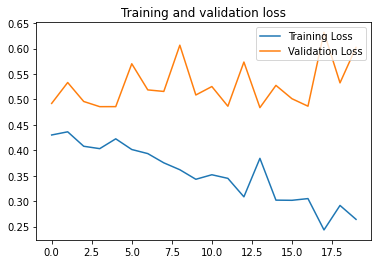

In [50]:
# Lets train some more. Our validation accuracy has already improved from .71 to .73. 
# Let see if it can go any higher.

#  Each time you call .fit, keras will continue training on the model. .fit does not reset model weights.

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=20
)

plot_history(history)

At this point, it looks like our Validation accuracy has flatted to around 75%. How do we get better. The only way would be to get some additional training data or use a pretrained model and start from there !!

# Transfer Learning using Mobilenet and Keras

We can use a pre-trained MobileNetV2 model as the feature detector. MobileNetV2 is the second iteration of MobileNet released by Google with the goal of being smaller and more lightweight than models like ResNet and Inception. 

Let’s load the MobileNetV2 model pre-trained on ImageNet without the top layer, freeze its weights, and add a new classification head.

In [32]:

def create_model_mv2():
    # Pre-trained model with MobileNetV2
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=IMG_SHAPE,
        include_top=False,
        weights='imagenet'
    )

    # Freeze the pre-trained model weights
    base_model.trainable = False

    # Trainable classification head
    maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
    prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')


    # Layer classification head with feature detector
    model = tf.keras.Sequential([
        base_model,
        maxpool_layer,
        prediction_layer
    ])
    
    return model


In [33]:
model = create_model_mv2()

9412608/9406464 [==============================] - 1s 0us/step


In [34]:

learning_rate = 0.001
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
              loss='binary_crossentropy',
              metrics=['accuracy']
)

history = None
epochs=10

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Number of epochs to train the model. An epoch is an iteration over the entire x
    epochs=epochs
)

# plot_history(history) Doesn't work since some keys are different in mobileV2



Epoch 1/10
16/16 [==============================] - 44s 3s/step - loss: 0.6731 - accuracy: 0.7585 - val_loss: 0.3064 - val_accuracy: 0.8860
Epoch 2/10
16/16 [==============================] - 43s 3s/step - loss: 0.2302 - accuracy: 0.9140 - val_loss: 0.2093 - val_accuracy: 0.9290
Epoch 3/10
16/16 [==============================] - 43s 3s/step - loss: 0.1583 - accuracy: 0.9430 - val_loss: 0.1652 - val_accuracy: 0.9300
Epoch 4/10
16/16 [==============================] - 43s 3s/step - loss: 0.1283 - accuracy: 0.9515 - val_loss: 0.1483 - val_accuracy: 0.9380
Epoch 5/10
16/16 [==============================] - 46s 3s/step - loss: 0.1086 - accuracy: 0.9590 - val_loss: 0.1410 - val_accuracy: 0.9380
Epoch 6/10
16/16 [==============================] - 45s 3s/step - loss: 0.0943 - accuracy: 0.9660 - val_loss: 0.1303 - val_accuracy: 0.9450
Epoch 7/10
16/16 [==============================] - 44s 3s/step - loss: 0.0846 - accuracy: 0.9670 - val_loss: 0.1252 - val_accuracy: 0.9470
Epoch 8/10
16/16 [==

KeyError: 'acc'

In [39]:
history.history

{'loss': [0.6731473803520203,
  0.2301868498325348,
  0.15825089812278748,
  0.12826484441757202,
  0.10857286304235458,
  0.09432665258646011,
  0.084602952003479,
  0.07576208561658859,
  0.06913268566131592,
  0.06003998965024948],
 'accuracy': [0.7584999799728394,
  0.9139999747276306,
  0.9430000185966492,
  0.9514999985694885,
  0.9589999914169312,
  0.9660000205039978,
  0.9670000076293945,
  0.972000002861023,
  0.9725000262260437,
  0.9764999747276306],
 'val_loss': [0.3063506484031677,
  0.2093082219362259,
  0.16521212458610535,
  0.14829598367214203,
  0.14096397161483765,
  0.13034459948539734,
  0.1252482533454895,
  0.13245755434036255,
  0.1240357905626297,
  0.1201598048210144],
 'val_accuracy': [0.8859999775886536,
  0.9290000200271606,
  0.9300000071525574,
  0.9380000233650208,
  0.9380000233650208,
  0.9449999928474426,
  0.9470000267028809,
  0.9509999752044678,
  0.9509999752044678,
  0.9509999752044678]}

In [40]:
def plot_history(history):

    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')

    plt.figure()


    # Plot training and validation loss per epoch
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and validation loss')
    

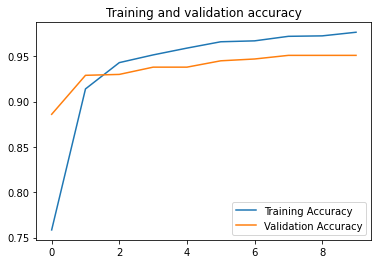

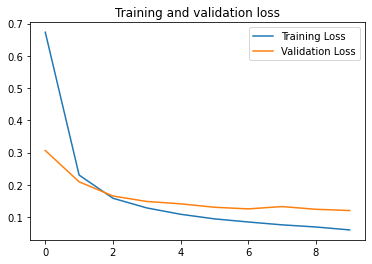

In [41]:
plot_history(history)


Using a pretrained model as the base model, we have increased our validation accuracy to `94%` (from 75%). This is a great improvement.

Could we do any better ?

# Fine-tune the model

Let’s try to improve the accuracy of our model even further. When we applied transfer learning, we only trained the new classification head of the model, freezing the weights from MobileNetV2. If we didn’t freeze those weights initially, the model would “forget” all the knowledge it started with since the new classification head was randomly initialized. 

However, now that we’ve trained the classification head first, we can unfreeze layers in the pre-trained model to fine-tune on this particular dataset.


In [43]:
# Unfreeze all layers of MobileNetV2
base_model.trainable = True

# Refreeze layers until the layers we want to fine-tune
for layer in base_model.layers[:100]:
  layer.trainable =  False


# Use a lower learning rate
lr_finetune = learning_rate / 10

# Recompile the model
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=lr_finetune),
              metrics=['accuracy'])


# Fine-tune model

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Increase training epochs for fine-tuning
    epochs=20
)



Epoch 1/20
16/16 [==============================] - 48s 3s/step - loss: 0.0556 - accuracy: 0.9805 - val_loss: 0.1198 - val_accuracy: 0.9500
Epoch 2/20
16/16 [==============================] - 48s 3s/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.1190 - val_accuracy: 0.9510
Epoch 3/20
16/16 [==============================] - 46s 3s/step - loss: 0.0514 - accuracy: 0.9805 - val_loss: 0.1185 - val_accuracy: 0.9510
Epoch 4/20
16/16 [==============================] - 45s 3s/step - loss: 0.0505 - accuracy: 0.9805 - val_loss: 0.1184 - val_accuracy: 0.9520
Epoch 5/20
16/16 [==============================] - 45s 3s/step - loss: 0.0491 - accuracy: 0.9835 - val_loss: 0.1181 - val_accuracy: 0.9510
Epoch 6/20
16/16 [==============================] - 44s 3s/step - loss: 0.0480 - accuracy: 0.9830 - val_loss: 0.1183 - val_accuracy: 0.9520
Epoch 7/20
16/16 [==============================] - 46s 3s/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.1178 - val_accuracy: 0.9530
Epoch 8/20
16/16 [==

After further fine tuning, we have improved to `96%` !!

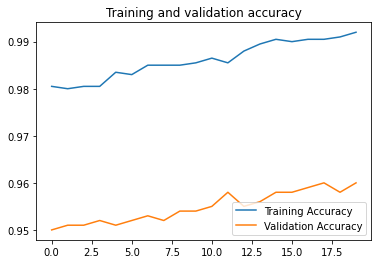

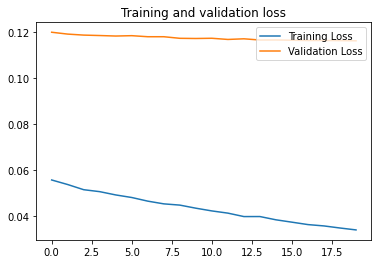

In [45]:
plot_history(history)

In [50]:
# Can we go higher !! Lets try.

# Use even a lower learning rate
lr_finetune = learning_rate / 100

# Fine-tune model

history = model.fit(
    # Input data
    x=train_data_gen,
    # Data on which to evaluate the loss and any model metrics at the end of each epoch.
    validation_data=val_data_gen,
    # Increase training epochs for fine-tuning
    epochs=30
)


Epoch 1/30
16/16 [==============================] - 44s 3s/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 0.1163 - val_accuracy: 0.9620
Epoch 2/30
16/16 [==============================] - 43s 3s/step - loss: 0.0328 - accuracy: 0.9920 - val_loss: 0.1161 - val_accuracy: 0.9600
Epoch 3/30
16/16 [==============================] - 43s 3s/step - loss: 0.0316 - accuracy: 0.9915 - val_loss: 0.1161 - val_accuracy: 0.9600
Epoch 4/30
16/16 [==============================] - 43s 3s/step - loss: 0.0311 - accuracy: 0.9915 - val_loss: 0.1160 - val_accuracy: 0.9580
Epoch 5/30
16/16 [==============================] - 43s 3s/step - loss: 0.0303 - accuracy: 0.9930 - val_loss: 0.1160 - val_accuracy: 0.9610
Epoch 6/30
16/16 [==============================] - 43s 3s/step - loss: 0.0298 - accuracy: 0.9935 - val_loss: 0.1160 - val_accuracy: 0.9600
Epoch 7/30
16/16 [==============================] - 46s 3s/step - loss: 0.0291 - accuracy: 0.9930 - val_loss: 0.1159 - val_accuracy: 0.9590
Epoch 8/30
16/16 [==

Looks like we have stalled at 96%. Not bad !!

## Final Test

In [18]:

def final_test(probabilities):
    #Dog is 1, Cat 0.
    answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
                1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
                1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
                0, 0, 0, 0, 0, 0]

    correct = 0

    for probability, answer in zip(probabilities, answers):
      if np.round(probability) == answer:
        correct +=1

    percentage_identified = (correct / len(answers))

    passed_challenge = percentage_identified > 0.63

    print(f"model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

    if passed_challenge:
      print("You passed the challenge!")
    else:
      print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

In [52]:
probabilities = model.predict(test_data_gen)

In [53]:
final_test(probabilities)

model correctly identified 0.96% of the images of cats and dogs.
You passed the challenge!



# Serialization and saving

See https://keras.io/guides/serialization_and_saving/



In [54]:
model.save("trained_model_96percent_accurate")


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trained_model_96percent_accurate/assets


In [55]:
# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("trained_model_96percent_accurate")

In [56]:
probabilities = reconstructed_model.predict(test_data_gen)
final_test(probabilities)

model correctly identified 0.96% of the images of cats and dogs.
You passed the challenge!


## Keras H5 format

Keras also supports saving a single HDF5 file containing the model's architecture, weights values, and compile() information. It is a light-weight alternative to SavedModel.

In [6]:
model.save("trained_model_96percent_accurate.h5")


In [7]:
reconstructed_model = tf.keras.models.load_model("trained_model_96percent_accurate.h5")

In [19]:
probabilities = reconstructed_model.predict(test_data_gen)
final_test(probabilities)

model correctly identified 0.96% of the images of cats and dogs.
You passed the challenge!
